In [172]:
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage.io import imsave
import numpy as np
from PIL import Image
%matplotlib inline

In [173]:
b1 = []
b2 =[]
b3=[]
r1 =[]
r2 =[]
r3=[]
g1 =[]
g2 =[]
g3=[]
daylight = []
light = []
true = []
lightDir = "./light/"
trueDir = "./true/"
daylightDir = "./daylight/"

In [174]:
for i in range(1,26):
    img1 = imread(lightDir +"l"+str(i)+".png")
    img2 = imread(trueDir +"t"+str(i)+".png")
    img3 = imread(daylightDir +"d"+str(i)+".png")
    average_color1 = [img1[:, :, i].mean() for i in range(img1.shape[-1])]
    b1.append(average_color1[2])
    r1.append(average_color1[0])
    g1.append(average_color1[1])
    light.append([average_color1[0],average_color1[1],average_color1[2]])
    average_color2 = [img2[:, :, i].mean() for i in range(img2.shape[-1])]
    b2.append(average_color2[2])
    r2.append(average_color2[0])
    g2.append(average_color2[1])
    true.append([average_color2[0],average_color2[1],average_color2[2]])

    average_color3 = [img3[:, :, i].mean() for i in range(img3.shape[-1])]
    b3.append(average_color3[2])
    r3.append(average_color3[0])
    g3.append(average_color3[1])
    daylight.append([average_color3[0],average_color3[1],average_color3[2]])



In [175]:
from sklearn import svm
model = svm.SVR(kernel='linear', C=1, gamma=1) 

X = np.array(daylight[0:15] + daylight[16:])
y = np.array(r1[:15]+r1[16:])
y.shape = (y.shape[0],1)
print X.shape,y.shape

svr_rbf = svm.SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = svm.SVR(kernel='linear', C=1e3)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)

test_X = np.array([daylight[15]])
print svr_rbf.predict(test_X)
print "predicted red", svr_lin.predict(test_X)
print "true red", r1[15]

(24, 3) (24, 1)
[ 74.69567481]
predicted red [ 21.11120984]
true red 8.1287784495


In [176]:
from sklearn import svm
model = svm.SVR(kernel='linear', C=1, gamma=1) 

X = np.array(daylight[0:15] + daylight[16:])
y = np.array(g1[:15]+g1[16:])
y.shape = (y.shape[0],1)
print X.shape,y.shape

svr_rbf = svm.SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = svm.SVR(kernel='linear', C=1e3)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)

test_X = np.array([daylight[15]])
print svr_rbf.predict(test_X)
print "predicted green", svr_lin.predict(test_X)
print "true green", g1[15]

(24, 3) (24, 1)
[ 83.60426113]
predicted green [ 83.95482672]
true green 54.897670697


In [177]:
from sklearn import svm
model = svm.SVR(kernel='linear', C=1, gamma=1) 

X = np.array(daylight[0:15] + daylight[16:])
y = np.array(b1[:15]+b1[16:])
y.shape = (y.shape[0],1)
print X.shape,y.shape

svr_rbf = svm.SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = svm.SVR(kernel='linear', C=1e3)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)

test_X = np.array([daylight[15]])
print svr_rbf.predict(test_X)
print "predicted blue", svr_lin.predict(test_X)
print "true blue", b1[15]

(24, 3) (24, 1)
[ 90.07982517]
predicted blue [ 152.42432234]
true blue 132.932654694


In [178]:
from sklearn.kernel_ridge import KernelRidge
X = np.array(daylight[:9]+daylight[10:])
y = np.array(b1[:9]+b1[10:])
y.shape = (y.shape[0],1)
clf = KernelRidge(alpha=1.0)
y_pred = clf.fit(X, y).predict(X) 
test_X = np.array([daylight[9]])
print "predicted blue", clf.predict(test_X)
print "true blue", b1[9]

predicted blue [[ 44.38992305]]
true blue 49.6384696385


(24, 1) (24, 1) (24, 1)


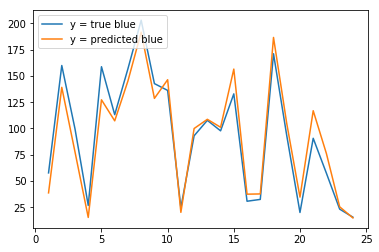

In [180]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,25)
x.shape = (x.shape[0],1)
print y.shape,x.shape,y_pred.shape
plt.plot(x, y)
plt.plot(x, y_pred)

plt.legend(['y = true blue', 'y = predicted blue'], loc='upper left')

plt.show()

In [181]:
from sklearn.kernel_ridge import KernelRidge
X = np.array(daylight[:9]+daylight[10:])
y = np.array(r1[:9]+r1[10:])
y.shape = (y.shape[0],1)
clf = KernelRidge(alpha=1.0)
y_pred = clf.fit(X, y).predict(X) 
test_X = np.array([daylight[9]])
print "predicted red", clf.predict(test_X)
print "true red", r1[9]

predicted red [[ 139.56923949]]
true red 155.206783082


(24, 1) (24, 1) (24, 1)


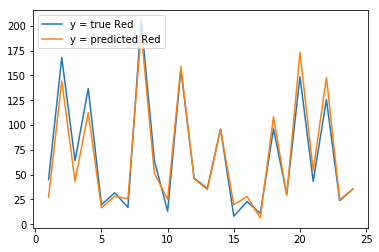

In [182]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,25)
x.shape = (x.shape[0],1)
print y.shape,x.shape,y_pred.shape
plt.plot(x, y)
plt.plot(x, y_pred)

plt.legend(['y = true Red', 'y = predicted Red'], loc='upper left')

plt.show()

In [183]:
from sklearn.kernel_ridge import KernelRidge
X = np.array(daylight[:9]+daylight[10:])
y = np.array(g1[:9]+g1[10:])
y.shape = (y.shape[0],1)
clf = KernelRidge(alpha=1.0)
y_pred = clf.fit(X, y).predict(X) 
test_X = np.array([daylight[9]])
print "predicted green", clf.predict(test_X)
print "true green", g1[9]

predicted green [[ 29.68337888]]
true green 30.0747191997


(24, 1) (24, 1) (24, 1)


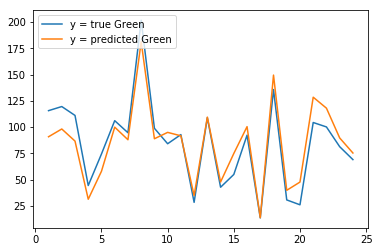

In [184]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,25)
x.shape = (x.shape[0],1)
print y.shape,x.shape,y_pred.shape
plt.plot(x, y)
plt.plot(x, y_pred)

plt.legend(['y = true Green', 'y = predicted Green'], loc='upper left')

plt.show()

In [185]:
print r1[9],g1[9],b1[9]

155.206783082 30.0747191997 49.6384696385


In [206]:
pred_red = np.zeros(25)
pred_blue = np.zeros(25)
pred_green = np.zeros(25)

In [207]:
for index in range(0,25):
    X = np.array(daylight[:index]+daylight[index+1:])
    y = np.array(r1[:index]+r1[index+1:])
    y.shape = (y.shape[0],1)
    clf = KernelRidge(alpha=1.0)
    y_pred = clf.fit(X, y).predict(X) 
    test_X = np.array([daylight[index]])
    predicted_red = clf.predict(test_X)
    pred_red[index] = predicted_red
#     print "index", index,"predicted red", predicted_red, "true red", r1[index]


In [208]:
for index in range(0,25):
    X = np.array(daylight[:index]+daylight[index+1:])
    y = np.array(g1[:index]+g1[index+1:])
    y.shape = (y.shape[0],1)
    clf = KernelRidge(alpha=1.0)
    y_pred = clf.fit(X, y).predict(X) 
    test_X = np.array([daylight[index]])
    predicted_green =  clf.predict(test_X)
    pred_green[index] = predicted_green
#     print "index", index,"predicted green",   predicted_green,"true green", g1[index]
    

In [209]:
for index in range(0,25):
    X = np.array(daylight[:index]+daylight[index+1:])
    y = np.array(b1[:index]+b1[index+1:])
    y.shape = (y.shape[0],1)
    clf = KernelRidge(alpha=1.0)
    y_pred = clf.fit(X, y).predict(X) 
    test_X = np.array([daylight[index]])
    predicted_blue =  clf.predict(test_X)
    pred_blue[index]=predicted_blue
#     print "index", index,"predicted blue", clf.predict(test_X),"true blue", b1[index]


In [210]:
pb = np.reshape(pred_blue,(5,5))
pr = np.reshape(pred_red,(5,5))
pg = np.reshape(pred_green,(5,5))
display = np.dstack((pr,pg,pb))

In [211]:
# print (pred_red == display[:,:,0]).all()
# print (pred_green == display[:,:,1]).all()
# print (pred_blue == display[:,:,2]).all()

In [212]:
# temp = plt.imread("light.jpg")
# print temp.shape
# a = temp[:,:,0]
# b = temp [:,:,1]
# c = temp [:,:,2]
# d = np.dstack((a,b,c))
# plt.imshow(d)

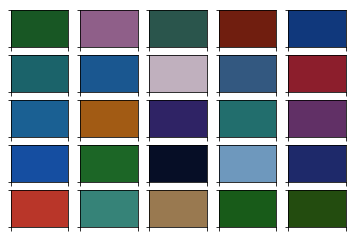

In [213]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(5, 5)
for i in range(5):
    for j in range(5):
            axarr[i,j].set_facecolor((display[i,j,0]/255,display[i,j,1]/255,display[i,j,2]/255))
            axarr[i,j].set_yticklabels([])
            axarr[i,j].set_xticklabels([])
f.savefig('whiteLightPredicted.svg', bbox_inches='tight', pad_inches=0)                                 
plt.show()

In [214]:
b1_new = np.reshape(b1,(5,5))
r1_new = np.reshape(r1,(5,5))
g1_new = np.reshape(g1,(5,5))
light_new = np.dstack((r1_new,g1_new,b1_new))

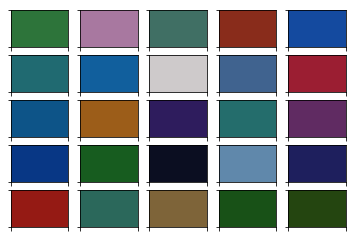

In [215]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(5, 5)
for i in range(5):
    for j in range(5):
            axarr[i,j].set_facecolor((light_new[i,j,0]/255,light_new[i,j,1]/255,light_new[i,j,2]/255))
            axarr[i,j].set_yticklabels([])
            axarr[i,j].set_xticklabels([])
f.savefig('whiteLight.svg', bbox_inches='tight', pad_inches=0)                     
plt.show()

In [216]:
pred_red = np.zeros(25)
pred_blue = np.zeros(25)
pred_green = np.zeros(25)

In [217]:
for index in range(0,25):
    X = np.array(daylight[:index]+daylight[index+1:])
    y = np.array(r2[:index]+r2[index+1:])
    y.shape = (y.shape[0],1)
    clf = KernelRidge(alpha=1.0)
    y_pred = clf.fit(X, y).predict(X) 
    test_X = np.array([daylight[index]])
    predicted_red = clf.predict(test_X)
    pred_red[index] = predicted_red
#     print "index", index,"predicted red", predicted_red, "true red", r2[index]


In [218]:
for index in range(0,25):
    X = np.array(daylight[:index]+daylight[index+1:])
    y = np.array(g2[:index]+g2[index+1:])
    y.shape = (y.shape[0],1)
    clf = KernelRidge(alpha=1.0)
    y_pred = clf.fit(X, y).predict(X) 
    test_X = np.array([daylight[index]])
    predicted_green =  clf.predict(test_X)
    pred_green[index] = predicted_green
#     print "index", index,"predicted green",   predicted_green,"true green", g2[index]
    

In [219]:
for index in range(0,25):
    X = np.array(daylight[:index]+daylight[index+1:])
    y = np.array(b2[:index]+b2[index+1:])
    y.shape = (y.shape[0],1)
    clf = KernelRidge(alpha=1.0)
    y_pred = clf.fit(X, y).predict(X) 
    test_X = np.array([daylight[index]])
    predicted_blue =  clf.predict(test_X)
    pred_blue[index]=predicted_blue
#     print "index", index,"predicted blue", clf.predict(test_X),"true blue", b2[index]


In [220]:
pb = np.reshape(pred_blue,(5,5))
pr = np.reshape(pred_red,(5,5))
pg = np.reshape(pred_green,(5,5))
display = np.dstack((pr,pg,pb))

(24, 1) (25, 1) (24, 1)


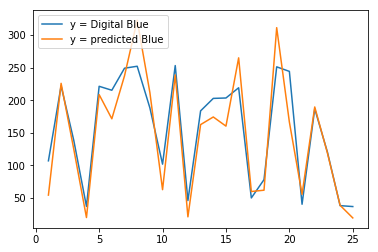

In [222]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,26)
x.shape = (x.shape[0],1)
print y.shape,x.shape,y_pred.shape
plt.plot(x, b2)
plt.plot(x, pred_blue)

plt.legend(['y = Digital Blue', 'y = predicted Blue'], loc='upper left')

plt.show()

(24, 1) (25, 1) (24, 1)


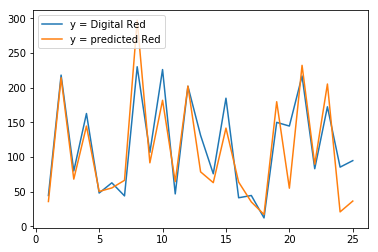

In [223]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,26)
x.shape = (x.shape[0],1)
print y.shape,x.shape,y_pred.shape
plt.plot(x, r2)
plt.plot(x, pred_red)

plt.legend(['y = Digital Red', 'y = predicted Red'], loc='upper left')

plt.show()

(24, 1) (25, 1) (24, 1)


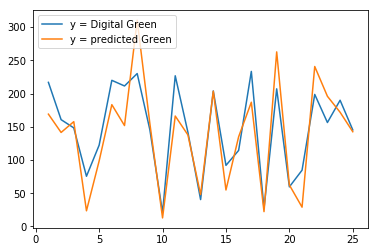

In [224]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,26)
x.shape = (x.shape[0],1)
print y.shape,x.shape,y_pred.shape
plt.plot(x, g2)
plt.plot(x, pred_green)

plt.legend(['y = Digital Green', 'y = predicted Green'], loc='upper left')

plt.show()

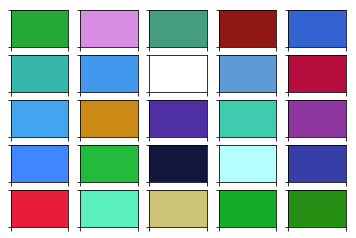

In [203]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(5, 5)
for i in range(5):
    for j in range(5):
            r = display[i,j,0]/255  if display[i,j,0]/255 < 1 else 1
            g = display[i,j,1]/255  if display[i,j,1]/255 < 1 else 1
            b = display[i,j,2]/255  if display[i,j,2]/255  < 1 else 1
            axarr[i,j].set_facecolor((r,g,b))
            axarr[i,j].set_yticklabels([])
            axarr[i,j].set_xticklabels([])
f.savefig('predictedDigital.svg', bbox_inches='tight', pad_inches=0)           
            
plt.show()

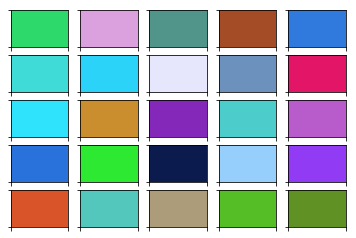

In [204]:
b2_new = np.reshape(b2,(5,5))
r2_new = np.reshape(r2,(5,5))
g2_new = np.reshape(g2,(5,5))
digital_new = np.dstack((r2_new,g2_new,b2_new))
import matplotlib.pyplot as plt
f, axarr = plt.subplots(5, 5)
for i in range(5):
    for j in range(5):
            axarr[i,j].set_facecolor((digital_new[i,j,0]/255,digital_new[i,j,1]/255,digital_new[i,j,2]/255))
            axarr[i,j].set_yticklabels([])
            axarr[i,j].set_xticklabels([])
f.savefig('digitalOriginal.svg', bbox_inches='tight', pad_inches=0)           
plt.show()

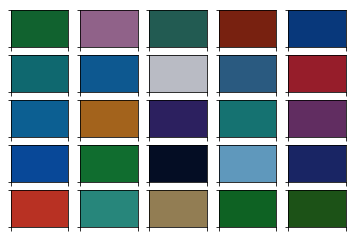

In [205]:
b3_new = np.reshape(b3,(5,5))
r3_new = np.reshape(r3,(5,5))
g3_new = np.reshape(g3,(5,5))
dlight_new = np.dstack((r3_new,g3_new,b3_new))
import matplotlib.pyplot as plt
f, axarr = plt.subplots(5, 5)
for i in range(5):
    for j in range(5):
            axarr[i,j].set_facecolor((dlight_new[i,j,0]/255,dlight_new[i,j,1]/255,dlight_new[i,j,2]/255))
            axarr[i,j].set_yticklabels([])
            axarr[i,j].set_xticklabels([])
f.savefig('daylight.svg', bbox_inches='tight', pad_inches=0)           
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,25)
x.shape = (x.shape[0],1)
print y.shape,x.shape,y_pred.shape
plt.plot(x, b1)
plt.plot(x, y_pred)

plt.legend(['y = true Green', 'y = predicted Green'], loc='upper left')

plt.show()

In [225]:
pred_red = np.zeros(25)
pred_blue = np.zeros(25)
pred_green = np.zeros(25)

In [226]:
for index in range(0,25):
    X = np.array(daylight[:index]+daylight[index+1:])
    y = np.array(g2[:index]+g2[index+1:])
    y.shape = (y.shape[0],1)
    svr_lin = svm.SVR(kernel='linear', C=1e3)
    y_pred = svr_lin.fit(X, y).predict(X) 
    test_X = np.array([daylight[index]])
    predicted_green =  clf.predict(test_X)
    pred_green[index] = predicted_green
   #     print "index", index,"predicted green",   predicted_green,"true green", g2[index]


In [228]:
for index in range(0,25):
    X = np.array(daylight[:index]+daylight[index+1:])
    y = np.array(r2[:index]+r2[index+1:])
    y.shape = (y.shape[0],1)
    svr_lin = svm.SVR(kernel='linear', C=1e3)
    y_pred = svr_lin.fit(X, y).predict(X) 
    test_X = np.array([daylight[index]])
    predicted_red =  clf.predict(test_X)
    pred_red[index] = predicted_red
   #     print "index", index,"predicted green",   predicted_green,"true green", g2[index]


In [229]:
for index in range(0,25):
    X = np.array(daylight[:index]+daylight[index+1:])
    y = np.array(b2[:index]+b2[index+1:])
    y.shape = (y.shape[0],1)
    svr_lin = svm.SVR(kernel='linear', C=1e3)
    y_pred = svr_lin.fit(X, y).predict(X) 
    test_X = np.array([daylight[index]])
    predicted_blue =  clf.predict(test_X)
    pred_blue[index] = predicted_blue
   #     print "index", index,"predicted green",   predicted_green,"true green", g2[index]


In [230]:
pb = np.reshape(pred_blue,(5,5))
pr = np.reshape(pred_red,(5,5))
pg = np.reshape(pred_green,(5,5))
display = np.dstack((pr,pg,pb))

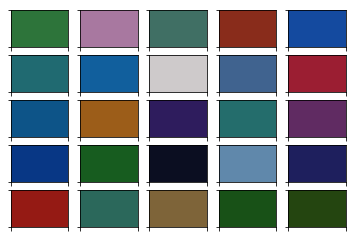

In [231]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(5, 5)
for i in range(5):
    for j in range(5):
            axarr[i,j].set_facecolor((light_new[i,j,0]/255,light_new[i,j,1]/255,light_new[i,j,2]/255))
            axarr[i,j].set_yticklabels([])
            axarr[i,j].set_xticklabels([])
f.savefig('dpredsvr.svg', bbox_inches='tight', pad_inches=0)                     
plt.show()